In [6]:
print("ok")

ok


In [7]:
from typing import Annotated
from typing import Literal
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langchain_experimental.utilities import PythonREPL
from typing_extensions import TypedDict
from langgraph.graph import MessagesState, END,StateGraph, START
from langgraph.types import Command
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import create_react_agent

In [92]:
import os
from dotenv import load_dotenv # Install with: pip install python-dotenv

load_dotenv() 
api_key = os.getenv("TAVILY_API_KEY")
print(f"Key loaded: {api_key}") # Verify it works without printing the whole key

Key loaded: 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


In [93]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model='gemini-2.5-pro') # Also correcting model name to a likely intended valid one
response = llm.invoke("what is capital of USA?")
print(response.content)
gemini_model = llm # Keep for downstream use

The capital of the USA is **Washington, D.C.**


In [94]:
tavaily_tool=TavilySearchResults()

In [95]:
tavaily_tool.invoke("what is a gdp?")

[{'title': 'What is GDP? - YouTube',
  'url': 'https://www.youtube.com/watch?v=_pTkwg6iUV0',
  'content': "[Music] gdp is the best-known three-letter acronym in economics but what exactly is gdp gdp or gross domestic product is the total market value of all final goods and services produced in an economy in a given year it measures the production of goods like pizza new houses cell phones and services like your favorite streaming channels the calculations are simple accounting multiplying the prices of the goods and services by the quantity sold and adding it all up for the entire economy it's important to note that all these goods are measured in the price at which they are sold to the end consumer in u.s dollars because one person's spending is another person's income gdp can be tracked by either adding up income earned from selling goods and services or by tracking spending on goods and",
  'score': 0.882276},
 {'title': 'What Is Gross Domestic Product (GDP)?',
  'url': 'https://mru

In [96]:
@tool
def news_vector_db(
    query: Annotated[str, "Search query to retrieve relevant latest from RAG news dataset."],
):
    """
    Use this tool to retrieve relevant News entries from RAGs.newsdf.
    Returns matching data results based on the query.
    """
    
    try:
        result = "This is the News data"
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"""
    
        Successfully executed:\n\n```query\n{query}\n```\nStdout: {result}
    
    """
    return result_str

@tool
def financial_data(
    query: Annotated[str, "Search query to retrieve relevant latest from RAG Financial dataset."],
):
    """
    Use this tool to retrieve relevant and latest Financial entries from RAGs.financialdf.
    Returns matching data results based on the query.
    """
    
    try:
        result = "This is the Financial data"
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"""
    
        Successfully executed:\n\n```query\n{query}\n```\nStdout: {result}
    
    """
    return result_str

@tool
def historical_model(
    query: Annotated[str, "OHLCV + indicator data in dictionary format."],
):
    """
    Use this tool to predict the next minute market data 
    using the historical_model.
    Input must contain OHLCV and indicator values.
    """
    
    try:
        result = "This is the Historical data"
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"""
    
        Successfully executed:\n\n```python\n{query}\n```\nStdout: {result}
    
    """
    return result_str

@tool
def market_live_data(
    query: Annotated[str, "Search query to retrieve relevant latest from RAG Market Live dataset."],
):
    """
    Use this tool to retrieve relevant Market Live entries from RAGs.marketlivedf.
    Returns matching data results based on the query.
    """
    
    try:
        result = "This is the Market live data"
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"""
    
        Successfully executed:\n\n```query\n{query}\n```\nStdout: {result}
    
    """
    return result_str

@tool
def book_data(
    query: Annotated[str, "Search query to retrieve relevant latest from RAG Stock Market Book dataset."],
):
    """
    Use this tool to retrieve relevant book entries from RAGs.bookdf.
    Returns matching data results based on the query.
    """
    
    try:
        result = "This is the Book data"
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"""
    
        Successfully executed:\n\n```query\n{query}\n```\nStdout: {result}
    
    """
    return result_str

In [97]:
class State(MessagesState):
    next:str

In [100]:
import re
import json

with open("signal.txt", "r", encoding="utf-8") as file:
    raw = file.read()

# 1️⃣ Remove newlines (optional)
raw = raw.strip()

# 2️⃣ Replace single quotes with double quotes
raw = raw.replace("'", '"')

# 3️⃣ Quote unquoted keys
# symbol: → "symbol":
raw = re.sub(r'([{,]\s*)(\w+)\s*:', r'\1"\2":', raw)

# 4️⃣ Quote ISO datetime values if not quoted
# 2026-02-13T15:59:32.000Z → "2026-02-13T15:59:32.000Z"
raw = re.sub(
    r':\s*(\d{4}-\d{2}-\d{2}T[0-9:\.\-Z]+)',
    r': "\1"',
    raw
)

# 5️⃣ Replace undefined with null
raw = raw.replace("undefined", "null")

# 6️⃣ Remove trailing commas before } or ]
raw = re.sub(r',\s*([}\]])', r'\1', raw)

# Now parse
signal = json.loads(raw)

print("Parsed Signal:", signal)


Parsed Signal: {'exch': 'NSE', 'instrument': 'EQUITY', 'securityId': '2885', 'symbolName': 'RELIANCE INDUSTRIES LTD', 'underlyingSymbol': 'RELIANCE', 'displayName': 'RELIANCE INDUSTRIES', 'lotSize': 1, 'tickSize': 10, 'ltp': 1419.5999755859375, 'strikeGap': 10, 'volume': 10755693, 'oi': 0, 'open': 1445.5, 'high': 1450.699951171875, 'low': 1416.300048828125, 'close': 1419.6, 'depth': [{'bidQty': 459, 'askQty': 0, 'bidOrders': 5, 'askOrders': 0, 'bidPrice': 1419.5999755859375, 'askPrice': 0}, {'bidQty': 0, 'askQty': 0, 'bidOrders': 0, 'askOrders': 0, 'bidPrice': 0, 'askPrice': 0}, {'bidQty': 0, 'askQty': 0, 'bidOrders': 0, 'askOrders': 0, 'bidPrice': 0, 'askPrice': 0}, {'bidQty': 0, 'askQty': 0, 'bidOrders': 0, 'askOrders': 0, 'bidPrice': 0, 'askPrice': 0}, {'bidQty': 0, 'askQty': 0, 'bidOrders': 0, 'askOrders': 0, 'bidPrice': 0, 'askPrice': 0}], 'change': -1.7197846160221562e-06, 'ltq': 3, 'ltt': 1770998372, 'lttDate': '2026-02-13T15:59:32.000Z', 'atp': 1423.72998046875, 'totalBuyQty': 

In [101]:
def retrieval_node(state: State) -> Command[Literal["intel_retrieval"]]:
    
    retrieval_agent = create_react_agent(llm, tools=[tavaily_tool, news_vector_db, financial_data, historical_model], prompt = """
                                                                                                                        You are a market intelligence retrieval agent.

                                                                                                                        Objective: Retrieve only high-impact information relevant to validating a trading signal.

                                                                                                                        Focus on:
                                                                                                                        - Market sentiment
                                                                                                                        - Recent news
                                                                                                                        - Macro events
                                                                                                                        - Technical context
                                                                                                                        - Financial fundamentals
                                                                                                                        - Historical pattern alignment

                                                                                                                        Use the signal date and symbol.
                                                                                                                        Return only concise, decision-critical findings.
                                                                                                                        No opinions. No assumptions. Only retrieved evidence.
                                                                                                                            """)
    
    result = retrieval_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="retrieval")
            ]
        },
    )

In [102]:
def intel_ret_node(state: State) -> Command[Literal["analyst"]]:
    
    intel_ret_agent = create_react_agent(llm, tools=[tavaily_tool, market_live_data, book_data], prompt="""
                                                                                                    Stock market intelligence retriever.
                                                                                                    Use live market data, fundamental book data, and web sources.
                                                                                                    Extract only decision-critical evidence for signal validation.
                                                                                                    No opinions. No assumptions. Evidence only.
                                                                                                        """)
    
    result = intel_ret_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="search_query")
            ]
        },
    )

In [103]:
def analyst_node(state: State) -> Command[Literal["decision_maker"]]:
    
    analyst_agent = create_react_agent(llm, tools=[tavaily_tool], prompt="""
                                                                        Market analyst.
                                                                        Combine all retrieved evidence.
                                                                        List critical bullish and bearish factors.
                                                                        Deliver a concise, decision-ready summary.
                                                                        No filler. No assumptions.
                                                                        """)
    
    result = analyst_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="analyst")
            ]
        },
    )

In [104]:
from pydantic import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import ChatPromptTemplate

class DecisionOutput(BaseModel):
    decision: str = Field(description="BUY or SELL")
    confidence: float = Field(description="Confidence between 0 and 1")
    reason: str = Field(description="Concise evidence-based reasoning")

prompt = ChatPromptTemplate.from_messages([
    ("system", """
Trading decision engine.
Evaluate analyst report.
Return BUY or SELL with confidence (0-1) and concise reasoning.
Evidence only. JSON only.
"""),
    ("human", "{input}")
])

structured_llm = llm.with_structured_output(DecisionOutput)

chain = prompt | structured_llm


In [105]:
def decision_maker_node(state: State) -> Command[Literal["__end__"]]:

    result = chain.invoke({
        "input": state["messages"][-1].content
    })

    return Command(
        update={
            "messages": [
                HumanMessage(content=result.model_dump_json(), name="decision_maker")
            ]
        }
    )


In [106]:
graph=StateGraph(State)

graph.add_node("retrieval", retrieval_node)
graph.add_node("intel_retrieval", intel_ret_node)
graph.add_node("analyst", analyst_node)
graph.add_node("decision_maker", decision_maker_node)

graph.add_edge(START,"retrieval")
graph.add_edge("retrieval", "intel_retrieval")
graph.add_edge("intel_retrieval", "analyst")
graph.add_edge("analyst", "decision_maker")

app=graph.compile()

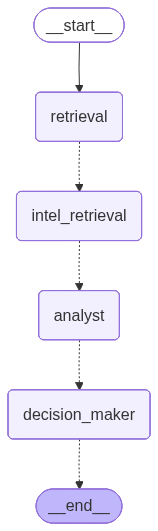

In [107]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [108]:
# With the graph created, we can now invoke it and see how it performs!
for s in app.stream({"messages": [("user", f"This is the Signal from beckand \n\n{signal} analyse the signal and tell whether to workon this or not")]}, subgraphs=True):
    print(s)
    print("----")

C:\Users\pc\AppData\Local\Temp\ipykernel_19020\3229333247.py:3: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  retrieval_agent = create_react_agent(llm, tools=[tavaily_tool, news_vector_db, financial_data, historical_model], prompt = """


(('retrieval:a968eac7-0d5e-802f-cfa4-ddcb6fe2fda5',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'news_vector_db', 'arguments': '{"query": "Reliance Industries market outlook"}'}, '__gemini_function_call_thought_signatures__': {'cfe42118-5930-4138-aa18-c499a2abe5b0': 'Ct0kAb4+9vuqa8j8+8lhtARnYlA6xCuWXW3gZxmvmg5i4SHl4I1zoEZ5YIlIEAcw/grQONDrXYdHMkXAytGOWfg2i0j8i4RkgLRaLt5ulgv+9WuMkmnNuDC+jMOd8jL8FA2p0HrHHVsTEwp9x34Lnm52nkT8NA34AKI0NFz5AZpi1juX+SPbdHz1gnpkDGVyajHHD8X7pJ3r7lUWRe9Nkgbs3DAlgcUWtfAzLcpwjHsqGstPt99Z4SIrI8yZPTBam5JRpIldGai8eC1dwmoUOuxB4/pIv726pAWvgC388vDfirVQFdT4RCfpqBuUKejajqUfUeywJIwAAv9VnrcBUToM7oEDIPL7XsAdcyaNhDX3Vh8P3R0fg2f7TZV0lCRbIKkO+91mGBbtBC0/KYCpGZ6LDVh48aAjS+GNEdq3ot0EJ9QXJizaYModwT4ad9fcdNRhFTjnhQQhzzNFRZ5nWVwVofXDdhX4B1Iw3Pt6GZxISuen43COTVtA968Ym3H1ufmosQ882BqHsDgib6b5lEZ42/h8U+Wb8GZVsDiaAKV9EjBNr3BgyEtc1GyN7RPXBvm/onj6lB6DtV2x3j2fCzusz/4rTCW3AU61DaVyINTbREqNGJ7HVmpwCOyjpt1g9k119K9qtxDwMyVLAMtsCjbihsHmBgaA3U2T1Xmta0X